In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: 0886081301_PN33grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.044e-03 +/- 6.832e-04 (15.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.84e+04 sec
 Using fit statistic: chi
 Using Background File                0886081301_PN33spec_bkg.fits
  Background Exposure Time: 1.84e+04 sec
 Using Response (RMF) File            0886081301_PN33spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886081301_PN33spec.arf



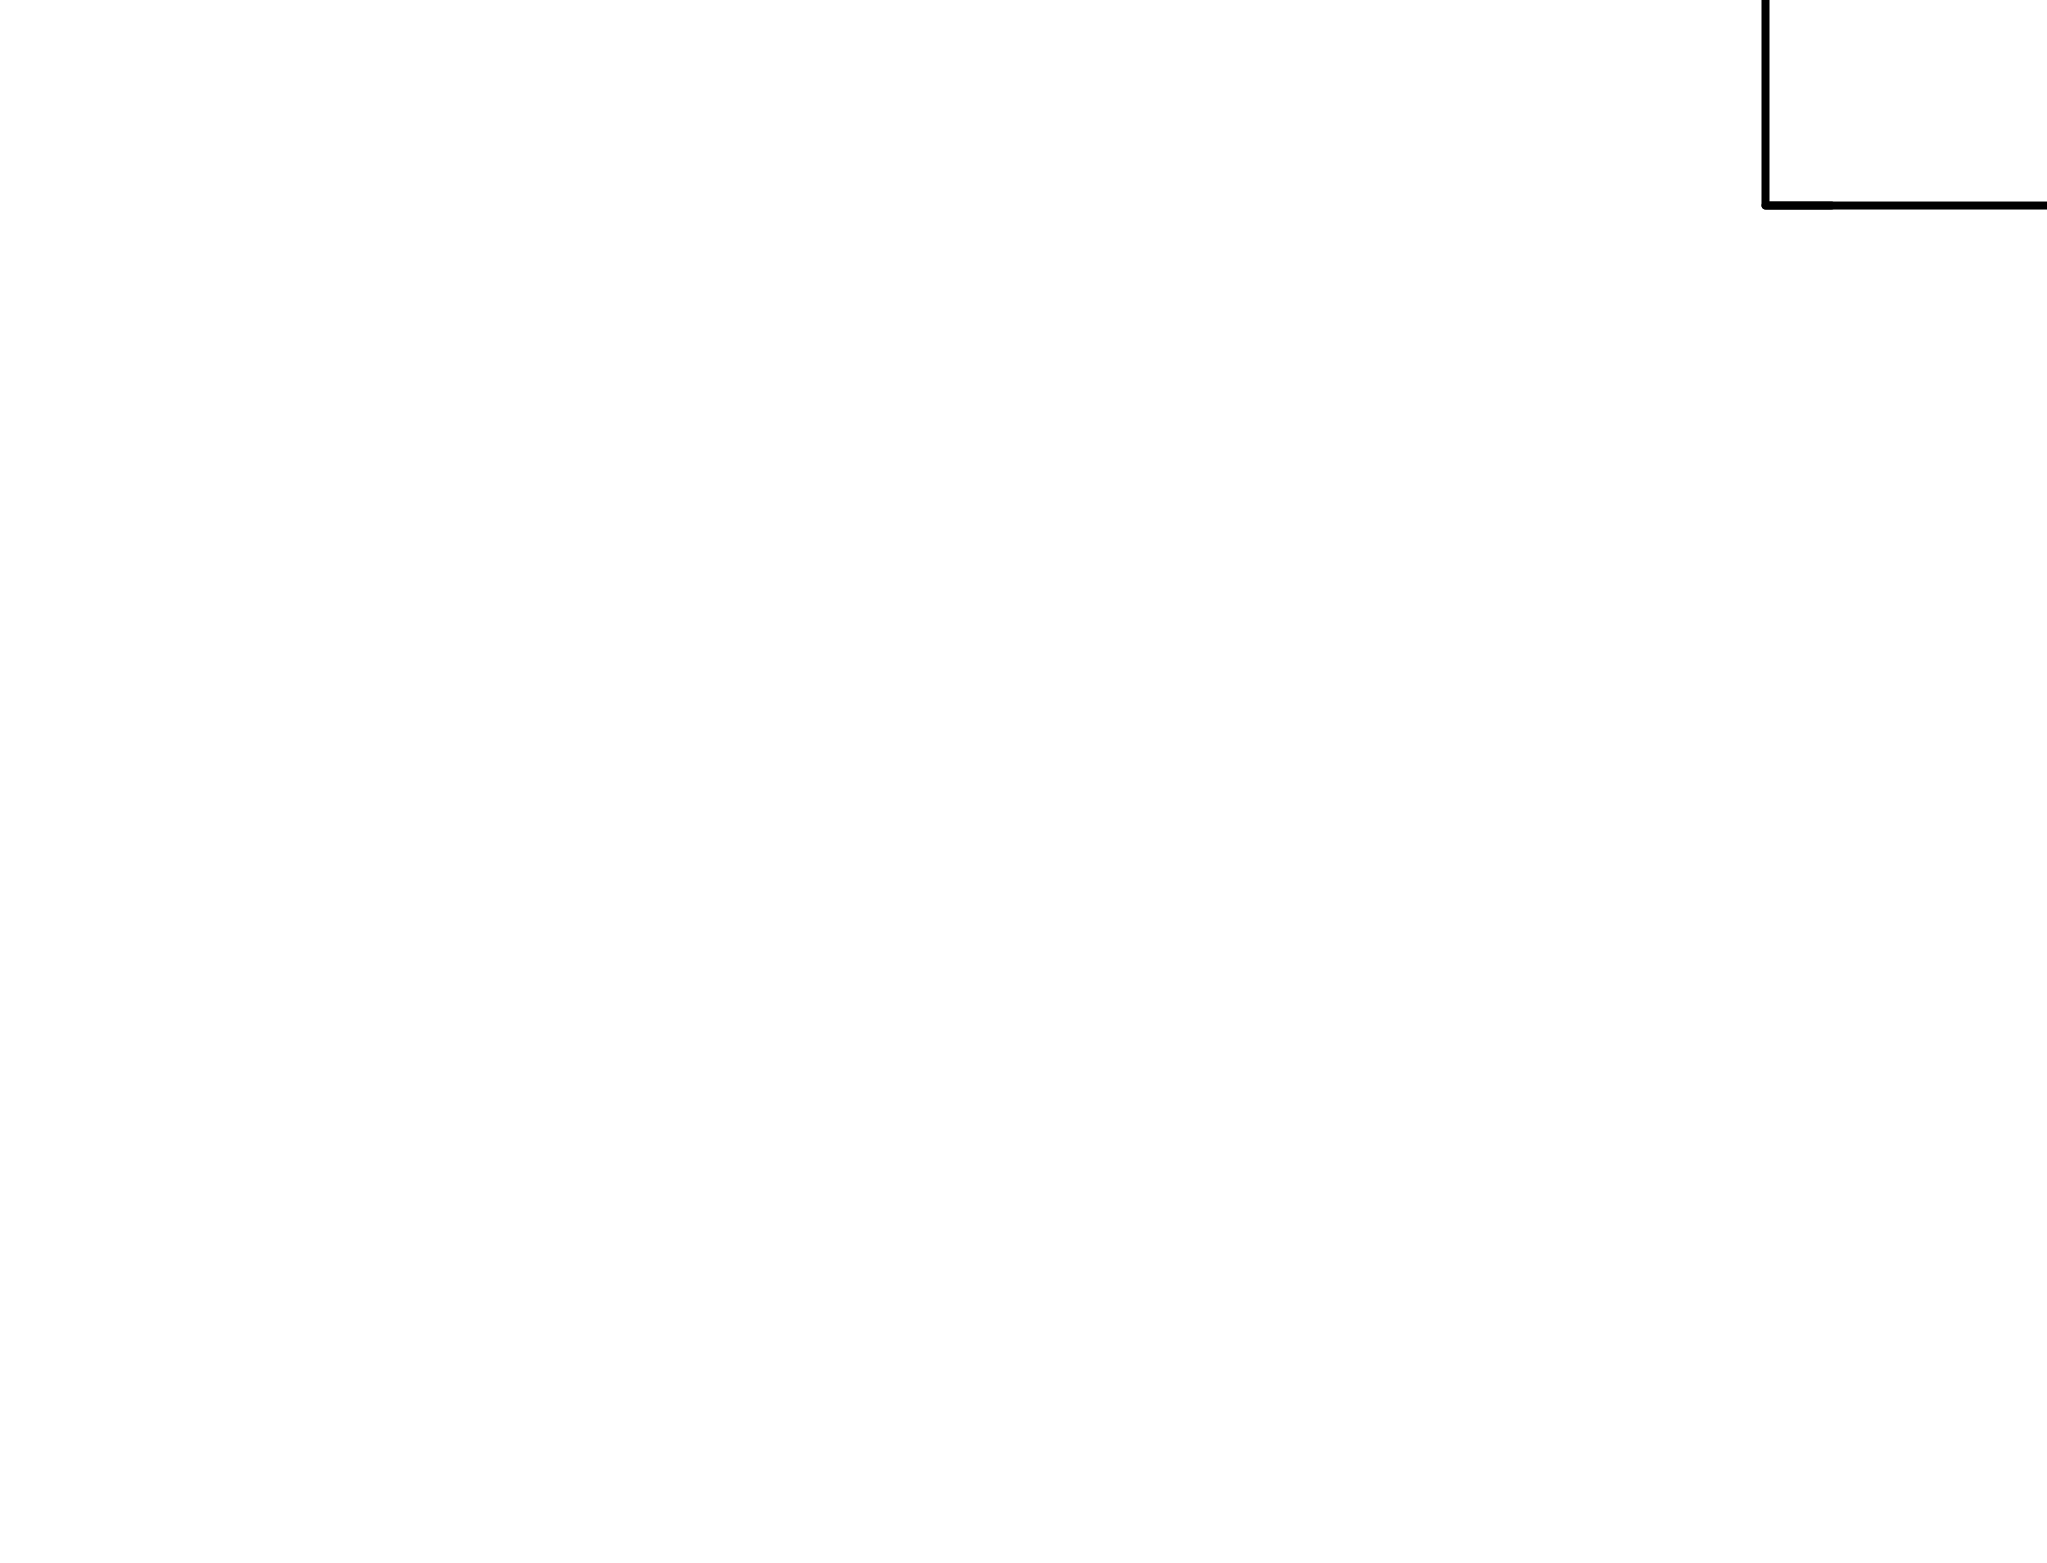

In [3]:
spec_fnames = glob.glob('*grpspec.fits')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (8) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

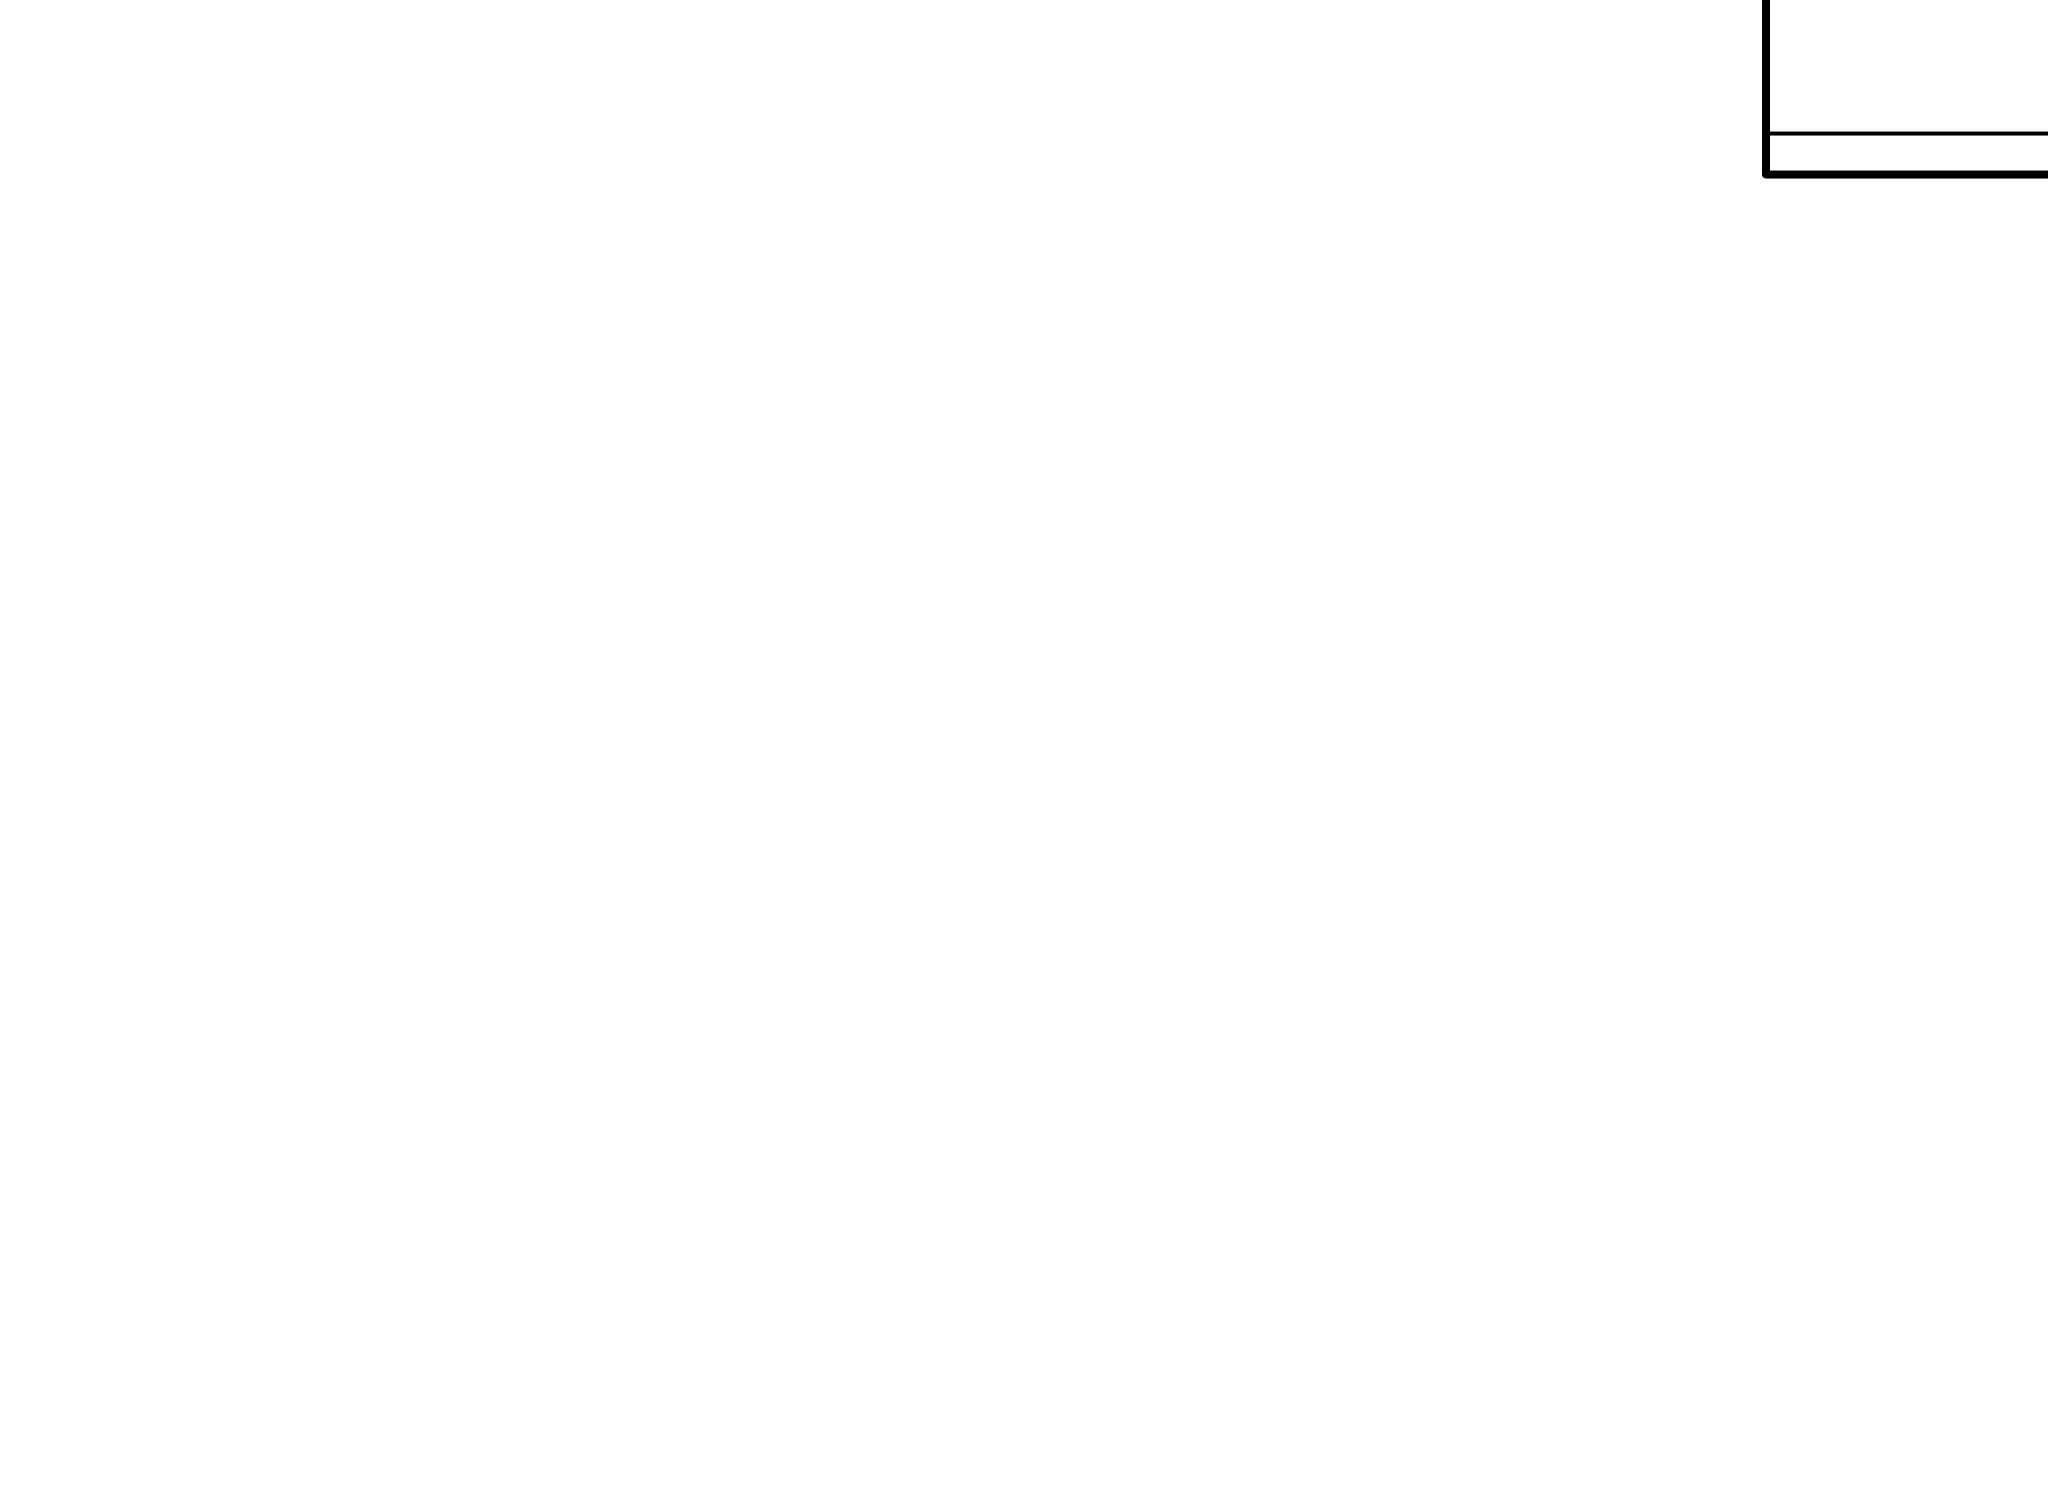

In [4]:
spec.ignore("**-0.1 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0

***Warning: Number of trials exceeded before convergence.
Current trial values 1.55226, 1.55339
and delta statistic 2.2957, 4.47567

Continue error search in this direction?      1            0      1.55283    (-0.106371,1.44646)
 Parameter   Confidence Range (2.706)
 Due to zero model norms, the following fit parameters are temporarily frozen:1 
 Due to zero model norms, the following fit parameters are temporarily frozen:1 
     2     0.216954       2.2271    (-0.791581,1.21856)



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.284331e+11     using 7 bins.

Test statistic : Chi-Squared              3.284331e+11     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
4.85415      0.997756     -1      0.456424       1.08601   5.28968e-06
4.23277      149847       -2      0.432989       1.29418   7.09825e-06
4.22735      21225.5      -3      0.603011       1.53553   9.47442e-06
4

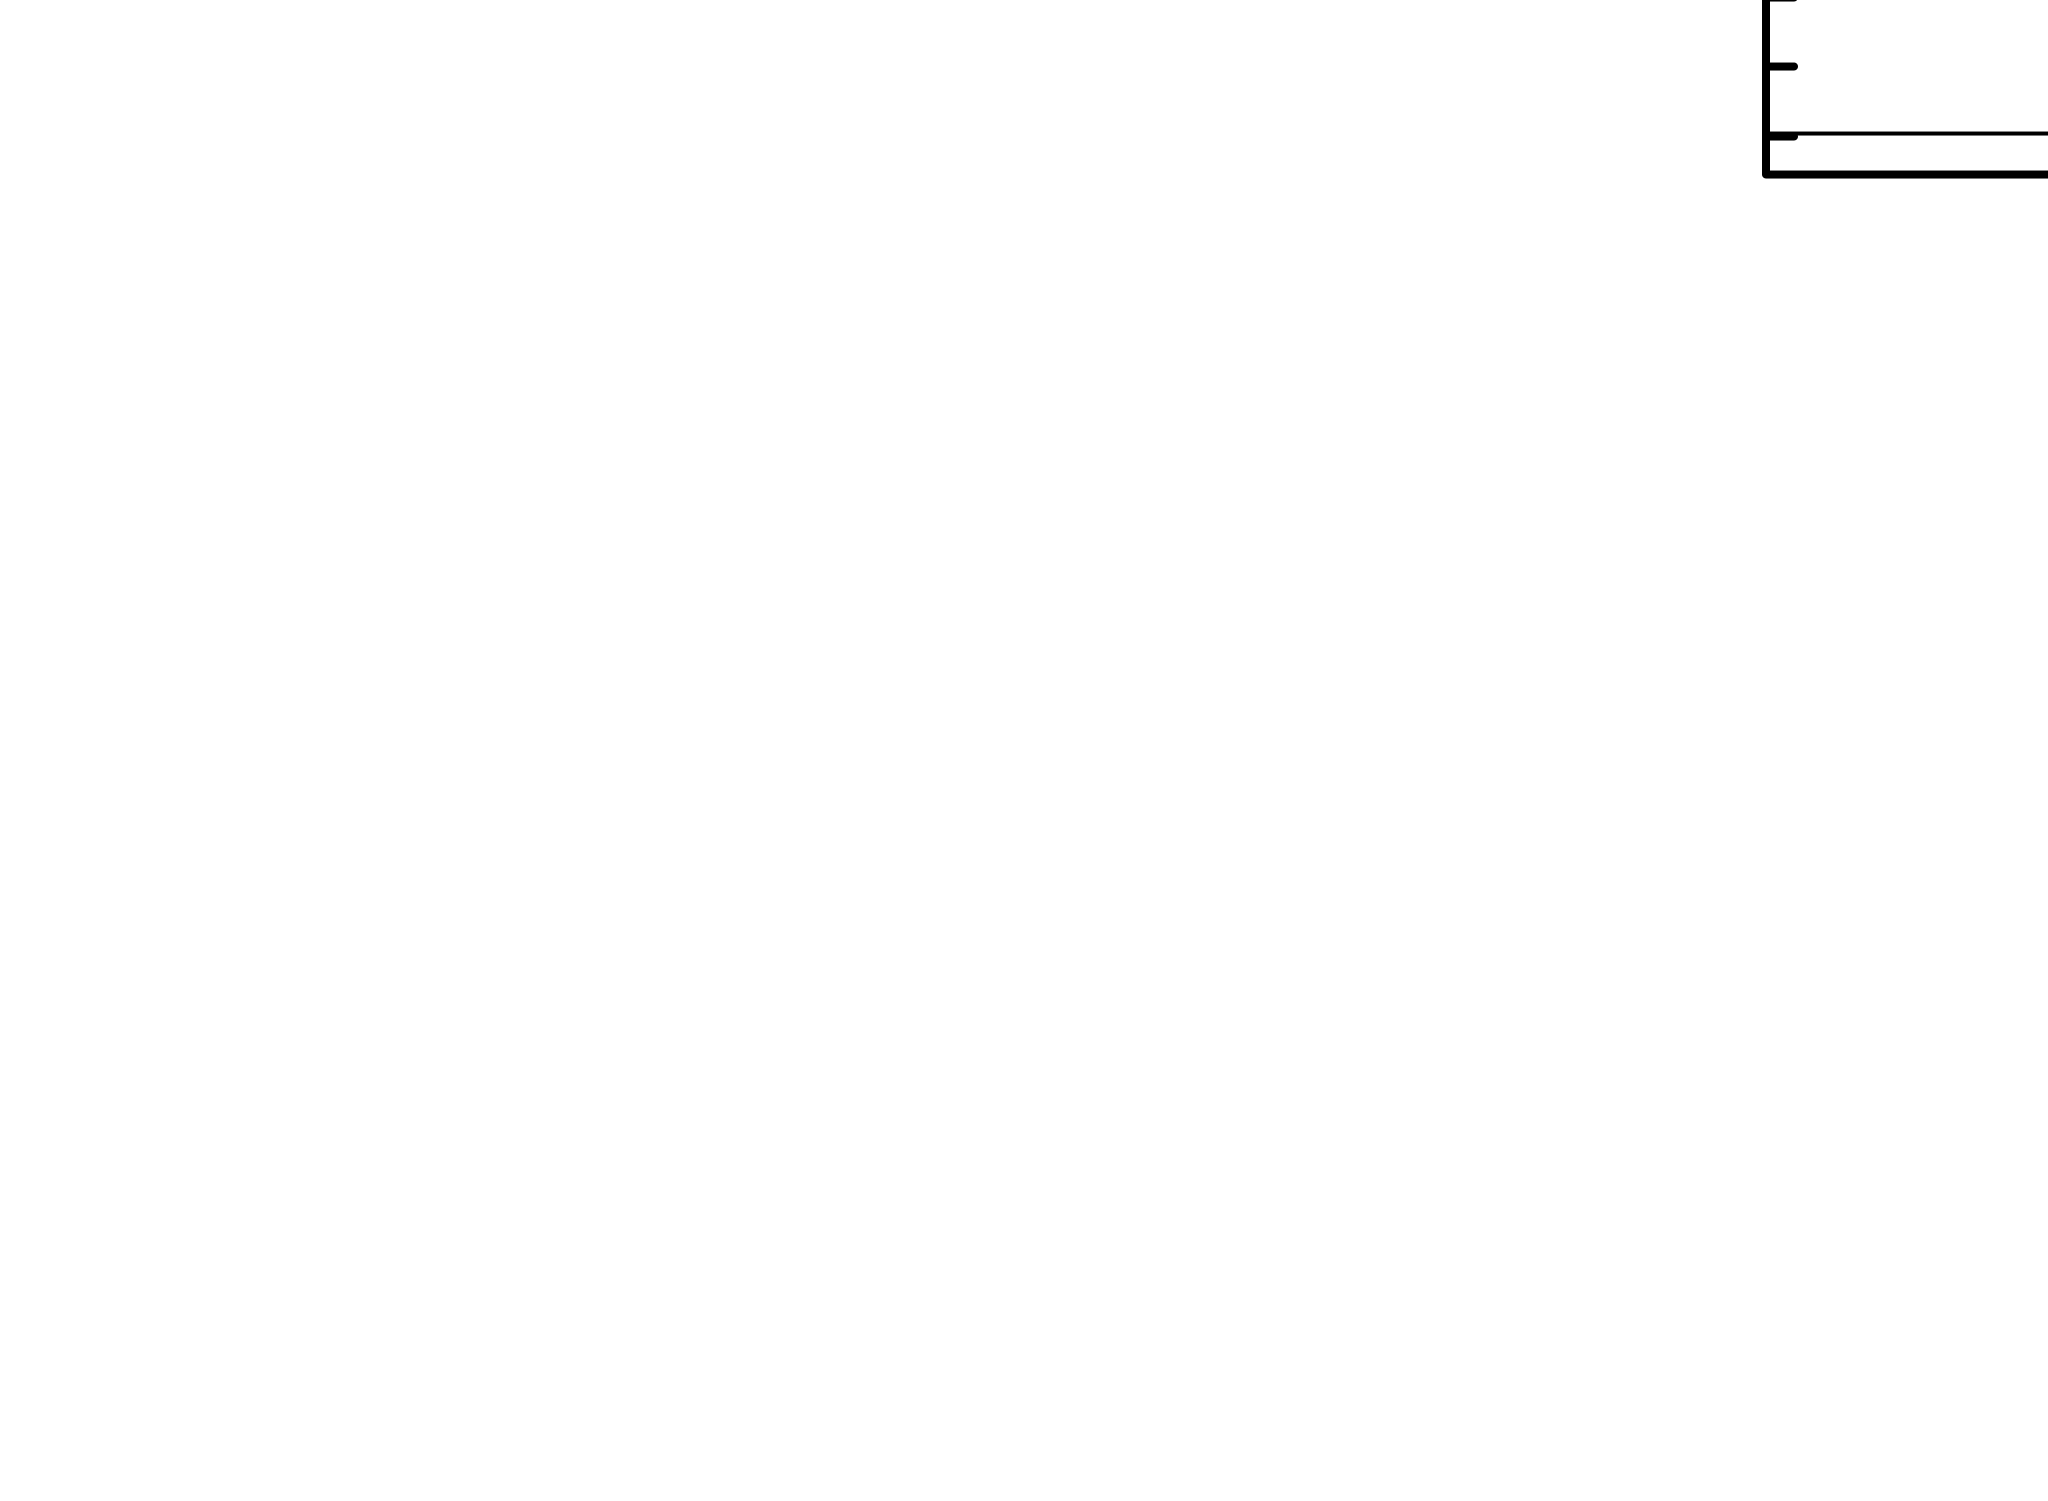

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
4.17101      0.00236352   -3      0.529812       1.45706   8.83660e-06
 Variances and Principal Axes
                 1        2        3  
 4.4186E-12| -0.0000  -0.0000   1.0000  
 7.7151E-02|  0.8778  -0.4790   0.0000  
 1.5202E+00|  0.4790   0.8778   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   4.083e-01   6.068e-01   6.601e-06
   6.068e-01   1.189e+00   1.159e-05
   6.601e-06   1.159e-05   1.222e-10
------------------------------------

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.529812     +/-  0.638958     
   2    2   powerlaw   PhoIndex            1.45706      +/-  1.09045      
   3    2   powerlaw   norm                8.83660E-06  +/-  1.10525E-0


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.222974e+10     using 7 bins.

Test statistic : Chi-Squared              6.222974e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.50819      0.687084     -1      0.429400       9.95121   1.12199e-05
4.2928       3299.36      -2      0.521519       14.2627   1.24015e-05
4.25681      12182.8      -1      0.457293       22.7018   1.25903e-05
4.2

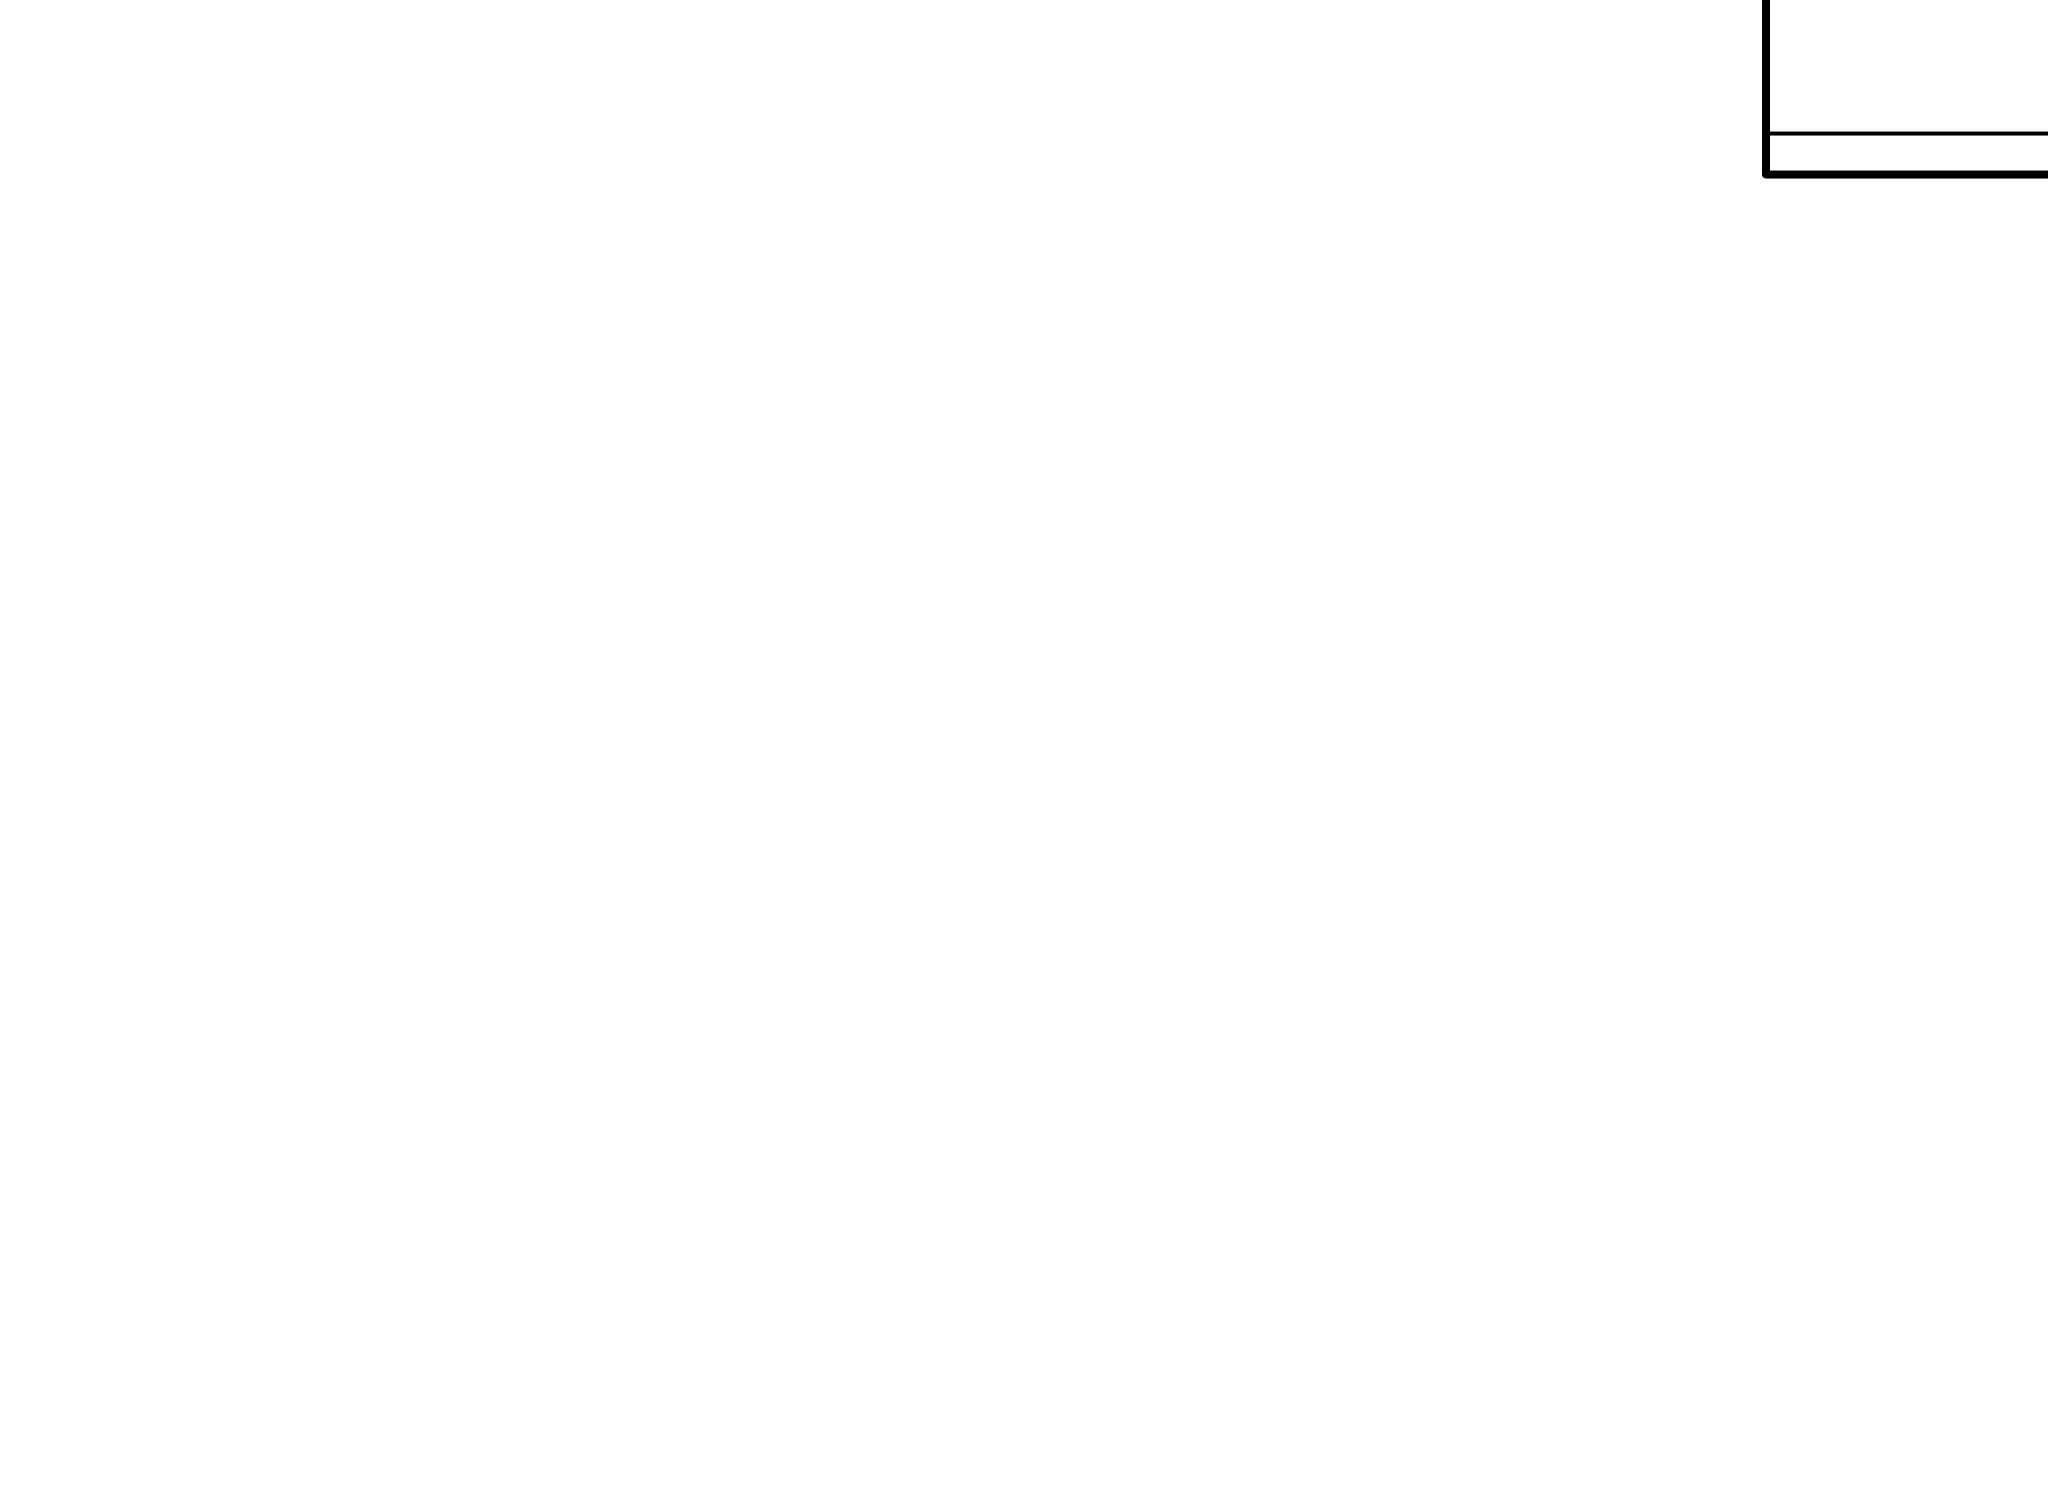

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.152592      1.40692    (-0.304632,0.949699)
 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.23263      0.00455719   -3      0.461593       41.0434   1.42094e-05
 Variances and Principal Axes
                 1        2        3  
 1.1378E-11| -0.0000  -0.0000   1.0000  
 9.3041E-02|  1.0000   0.0011   0.0000  
 1.1496E+05| -0.0011   1.0000   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.280e-01  -1.246e+02  -6.442e-06
  -1.246e+02   1.150e+05   6.884e-03
  -6.442e-06   6.884e-03   4.347e-10
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.461593     +/-  0.477536     
   2    2   bremss     kT         keV      41.0434   


***XSPEC Error:  No variable parameters for fit 

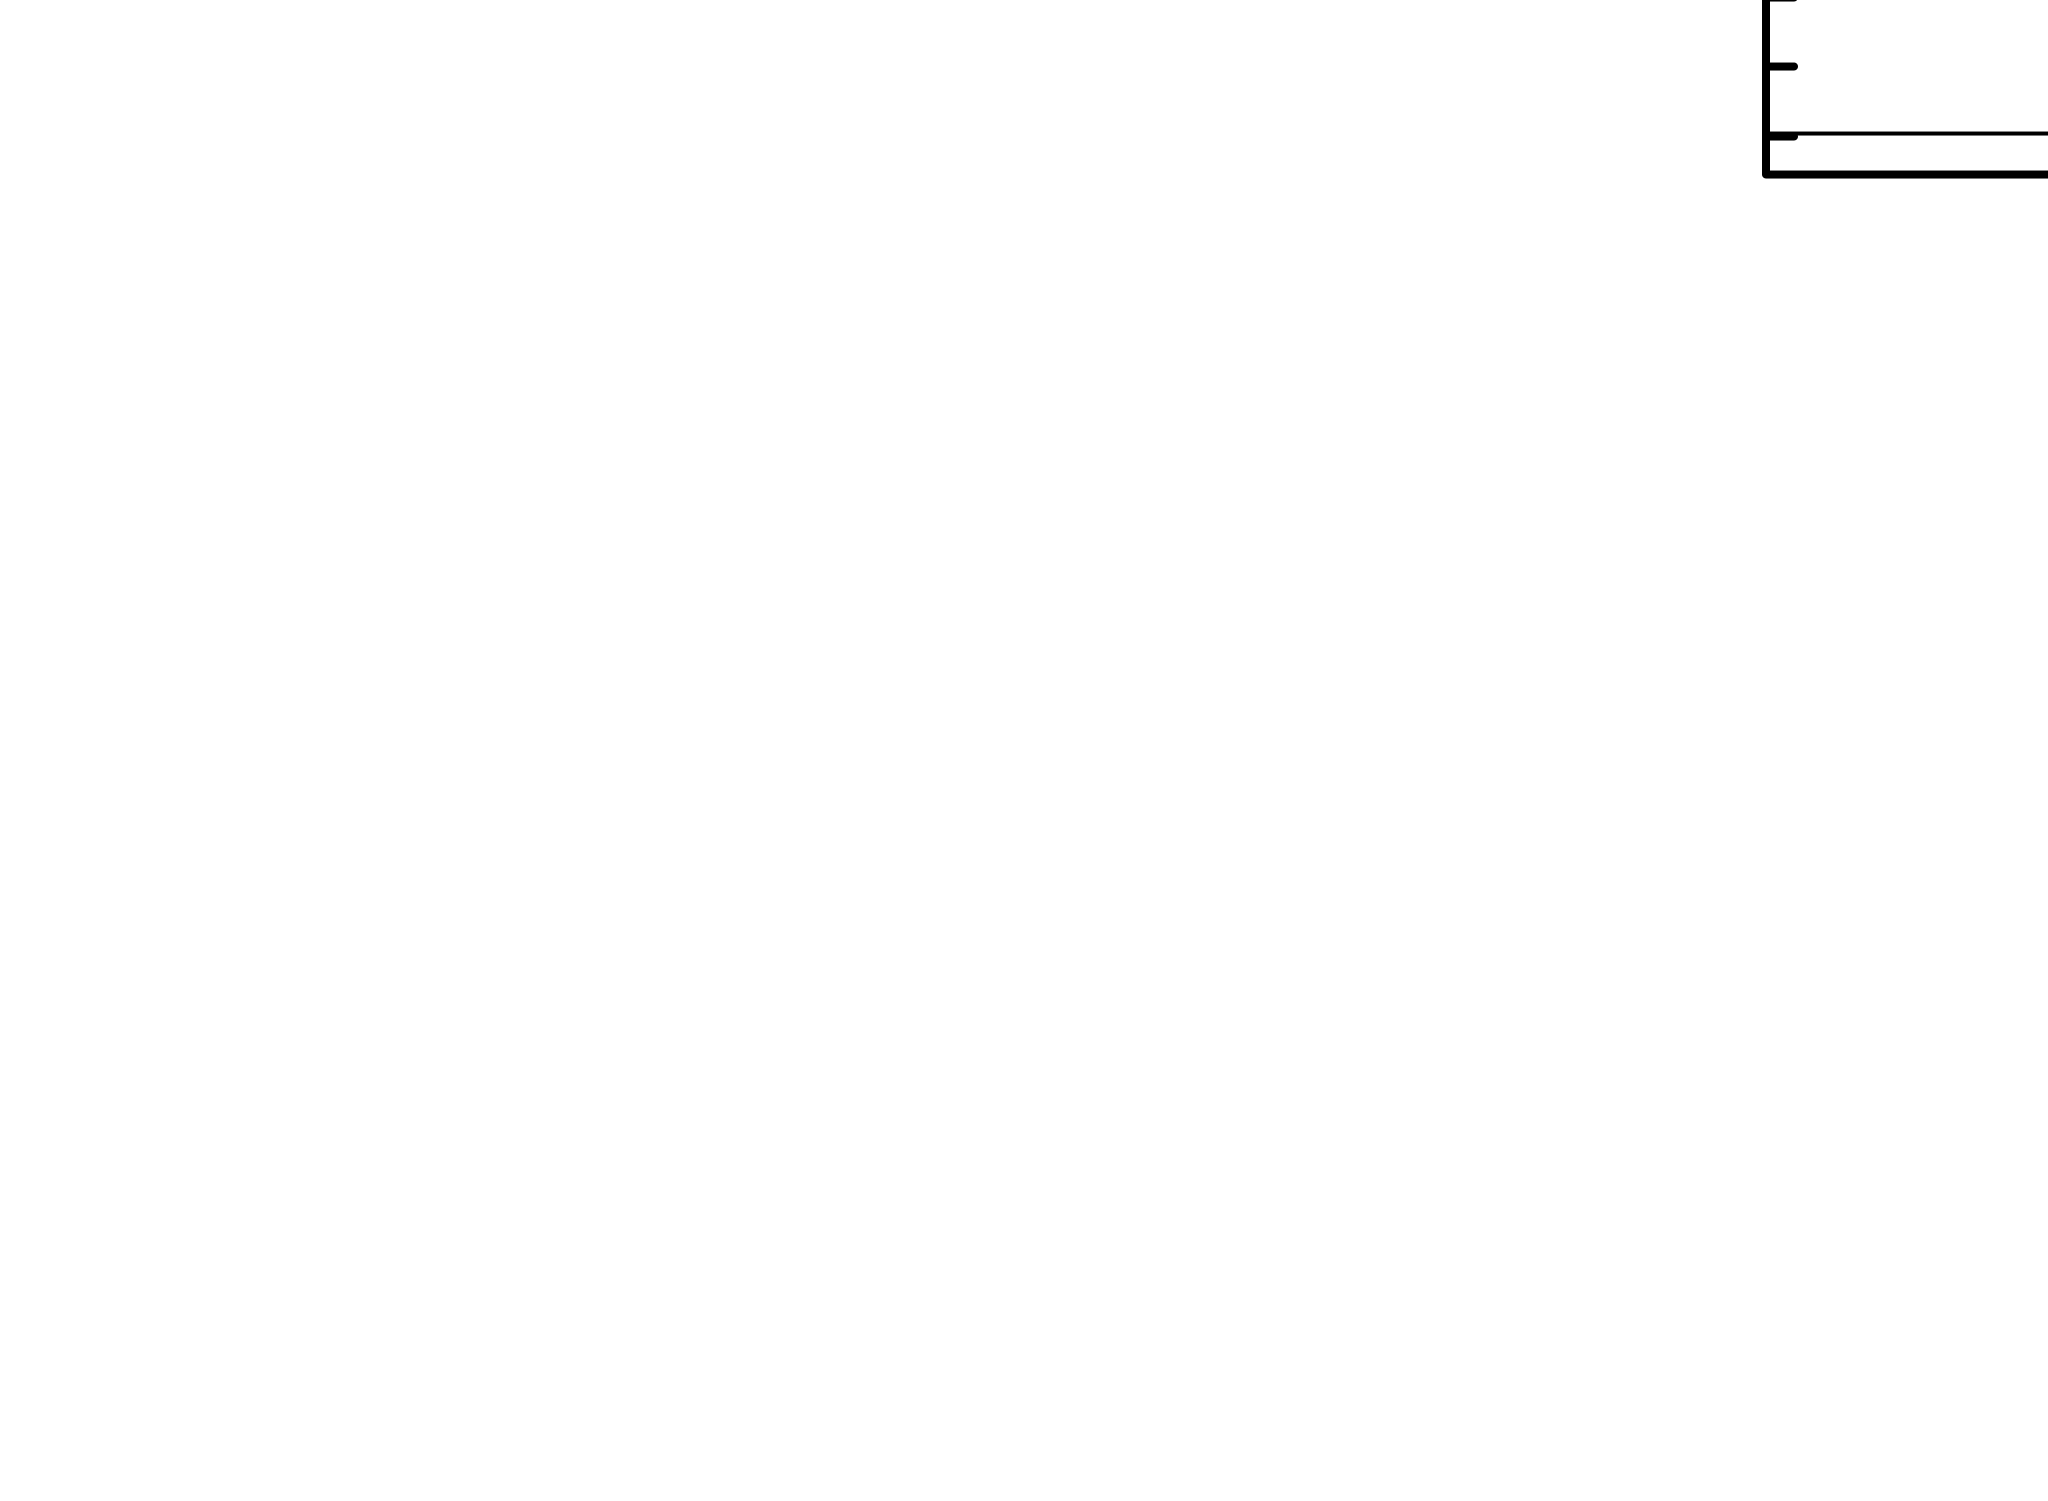


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.929258e+10     using 7 bins.

Test statistic : Chi-Squared              1.929258e+10     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
7.79432      1.77054      -1      0.984467       1.91545   2.6

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.164761      1.88662    (-0.391168,1.33069)
 Parameter   Confidence Range (2.706)
 Due to zero model norms, the following fit parameters are temporarily frozen:1 
 Due to zero model norms, the following fit parameters are temporarily frozen:1 

***Warning: Number of trials exceeded before convergence.
Current trial values 1.71879, 0.37315
and delta statistic 1.28959, 3.07887

Continue error search in this direction? ***Warning: Parameter pegged at hard limit: 64
     2     0.606735            0    (-7.03944,-7.64617)


In [12]:
np.savetxt('../spec11_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 9.9465e-06 photons (5.5502e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
plx = 0.4056
d_kpc = 1/plx
F_x = 5.5481*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

4.033944051315701e+31


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

2.4654832347140037
31.60572987048226


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*15.50)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  6.6250521170420265e-12
F_x / F_opt:  -2.0770450187925555
